## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import random
import scipy as sc
from scipy.stats import norm
import statsmodels.api as sm;




#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [3]:
print(df.shape)
df.describe()

(294478, 5)


user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()
#df.head()

290584

d. The proportion of users converted.

In [5]:
conv = df.query('converted == 1').user_id.nunique() / df['user_id'].nunique()
print(conv)

df.converted.mean()

0.12104245244060237


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
nt = df[(df.landing_page == 'new_page') & (df.group == 'control')]
print(nt.shape[0])
ot = df[(df.landing_page == 'old_page') & (df.group == 'treatment')]
print(ot.shape[0])
mismatch = nt + ot
mismatch.shape


1928
1965


(3893, 5)

f. Do any of the rows have missing values?

In [7]:
df.notnull()
print(df.shape)
#another way
df2 = df.dropna()
print(df2.shape) # no record dropped, means no missing value

df.isnull().sum()


(294478, 5)
(294478, 5)


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
print(df.shape)
temp = df.drop(df[(df.landing_page != "new_page") & (df.group =="treatment")].index)
temp.shape

df2 = temp.drop(temp[(temp.landing_page != "old_page") & (temp.group =="control")].index)
print(df2.shape)

(294478, 5)
(290585, 5)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()



290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()]

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(['user_id'], keep='first')
print(df2.shape)
df2[df2['user_id'].duplicated()]

(290584, 5)


Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print(df2.converted.mean())
df2.head()

0.11959708724499628


user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control = df2.query('group == "control"')
print(control.converted.mean())

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treat = df2.query('group == "treatment"')
print(treat.converted.mean())

0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
newp = df2.query('landing_page == "new_page"')
newp.head()
prob = newp.shape[0]/df2.shape[0]
prob

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
Based on the results so far, there are not enough evidence to confirm that "new treatment page leads to more conversion", below is my understanding:<br/>
    1. The conversion rate (or probability) of the control group is higher than the treatment group<br/>
    2. The probability that an individual received thew new page is 50%, so it doesn't prove anything<br/>
</div>    
</div>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
Null hypothsis: $p_{new}$ <= $p_{old}$ <br/>
Alternate: $p_{new}$ > $p_{old}$ <br/>
</div>    
</div>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# p(new0 <= p(old) = mean of total converted)
print(df2.converted.mean())
p_new = p_old = df2.converted.mean()
p_new,p_old

0.11959708724499628


(0.11959708724499628, 0.11959708724499628)

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# p(new0 <= p(old) = mean of total converted)
print(df2.converted.mean())

0.11959708724499628


c. What is $n_{new}$?

In [20]:
newp = df2.query('landing_page == "new_page"')
n_new = newp.shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
oldp = df2.query('landing_page == "old_page"')
n_old = oldp.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#new_page_converted = np.random.binomial(n_new,p_new)
#print(new_page_converted)
new_page_converted = np.random.choice([1, 0],n_new,p = [p_new, 1-p_new])
print(len(new_page_converted))



145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1, 0],n_old,p = [p_old, 1-p_old])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff1 = new_page_converted.mean() - old_page_converted.mean()
print('$p_{new}$ - $p_{old}$',diff1)

$p_{new}$ - $p_{old}$ 0.0007069049817662321


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_converted3 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    old_page_converted3 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_diffs.append(new_page_converted3.mean() - old_page_converted3.mean())
p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

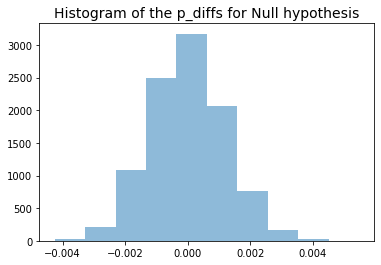

In [26]:
plt.title("Histogram of the p_diffs for Null hypothesis", fontsize=14)
# plotting both the graphs
plt.hist(p_diffs, alpha = 0.5);
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
control = df2.query('landing_page == "old_page"')
#control = df2.query('group == "control"')
old_page_converted4 = control.converted.mean()
print(old_page_converted4)



control = df2.query('landing_page == "new_page"')
#control = df2.query('group == "treatment"')
new_page_converted4 = control.converted.mean()
print(new_page_converted4)

a_diffs = new_page_converted4 - old_page_converted4
a_diffs



0.1203863045004612
0.11880806551510564


-0.0015782389853555567

In [28]:
(p_diffs > a_diffs).mean()

0.9095

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    The value calulated in the part j is <b> p-value = 0.9067 </b> <br/>
    The level of statistical significance is often expressed as a p-value between 0 and 1<br/>
    The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.<br/>
    A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct <br/>
    A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.<br/>
    <b><i><u> Conclusion:</u></i></b><br/>
    The difference between the new and old page values is not significant <br/>
<br/>
</div>
</div>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], 
                                              [n_old, n_new], alternative='smaller')
print('zscore = {:.5f}, pvalue = {:.5f}'.format(z_score, p_value))

zscore = 1.31092, pvalue = 0.90506


In [31]:
# convert z_score into p_value
p_values = 1 - sc.special.ndtr(z_score)
print(p_values)
print('convert z_score into p_value = ',norm.cdf(z_score))



0.09494168724097551
convert z_score into p_value =  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    The value calulated in the part j is <b> p-value = 0.9067 </b> <br/>
    <b><i><u> Conclusion (j & k):</u></i></b><br/>
    The difference between the new and old page values is not significant <br/>
    <br/>
    The Z score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. The p-value is the probability that you have falsely rejected the null hypothesis.<br/>
    <b><i><u> Conclusion (n):</u></i></b><br/>
    Since the calculated p-value (~0.9050) of the z-test is same as before, hence the findings are also same.
<br/>
</div>
</div>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    <b><i><u>Logistic Regression</u></i></b> is a classification algorithm which is used when we want to predict a categorical variable (Yes/No, conversion/no conversion) based on a set of independent variable(s).
<br/>
</div>
</div>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# create new dataframe for 3rd part
df3 = df2
df2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [33]:
df3['intercept'] = 1
df3[['control','treatment']] = pd.get_dummies(df2['group'])
df3 = df3.rename(columns={'treatment': 'ab_page'})
df3.head()




user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  control  ab_page  
0          1        1        0  
1          1        1        0  
2          1        0        1  
3          1        0        1  
4          1        1        0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'ab_page']])
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
print('**** summary. *********')
results.summary()

**** summary. *********


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Wed, 28 Oct 2020   Prob (F-statistic):              0.190
Time:                        21:13:52   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
<b><i><u> Recap - Part 1 and 2:</u></i></b><br/>
The value calulated in the part j is <b> p-value = 0.9067 </b> <br/>
<i><u> Conclusion (j & k):</u></i><br/>
The difference between the new and old page values is not significant <br/>
<br/>   
<b><i><u> Conclusion - Part 3 (d):</u></i></b><br/>
The p-value of the new model is 0.190, which is higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. 
    
><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
<b><i><u> Part 2:</u></i></b><br/>
Null hypothsis: $p_{new}$ <= $p_{old}$ <br/>
Alternate: $p_{new}$ > $p_{old}$ <br/>
<br/>   
<b><i><u> Part 3:</u></i></b><br/>    
Ho: The slope of the regression line is equal to zero, which is not the case here<br/>
Ha: The slope of the regression line is not equal to zero or one of the independent variable is useful in prediction and in this case it is -0.0016<br/>
<br/>
</div>    
</div>
<br/>
</div>
</div>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
<b><i><u>  why it is a good idea to consider other factors</u></i></b><br/>
As we are testing e-commerce website, additional factors/variables like age group, gender, salary slab, loyalty group will help us to validate the model against multiple factors and determine the relative influence of one or more predictor variables to the converted user, which could result in some great insights.
<br/>   
<b><i><u> A few of the disadvantages to adding additional terms</u></i></b><br/>    
 - Adding more variables is not always helpful and it could make the model complex and  create misleading values
 - It could also results in Simpson’s Paradox whereby overall trends that exist in aggregate either disappear or reverse when the data are broken down into groups.
<br/>
<br/>
</div>    
</div>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  control  ab_page  
user_id                                          
834778           0          1        1        0  
928468           0          1        0        1  
822059           1          1        0        1  
711597           0          1        1        0  
710616           0          1        0        1

In [37]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [38]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  control  ab_page  US  UK  CA  
user_id                                                      
834778           0          1        1        0   0   1   0  
928468           0          1        0        1   0   0   1  
822059           1          1        0        1   0   1   0  
711597           0          1        1        0   0   1   0  
710616           0          1        0        1   0   1   0

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
### Fit Your Linear Model And Obtain the Results
lm = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page','US','UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Wed, 28 Oct 2020   Prob (F-statistic):              0.178
Time:                        21:13:52   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
US            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Adding new variables to relate country with ab_page
df_new['ab_page_US'] = df_new['US']*df_new['ab_page']
df_new['ab_page_UK'] = df_new['UK']*df_new['ab_page']
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  control  ab_page  US  UK  CA  ab_page_US  \
user_id                                                                   
834778           0          1        1        0   0   1   0           0   
928468           0          1        0        1   0   0   1           0   
822059           1          1        0        1   0   1   0           0   
711597           0          1        1        0   0   1   0           0   
710616           0          1        0        1   0   1   0           0   

         ab_page_UK  
user_id              
834778            0  
928468            0  
822059            1  
711597            0  
710616            1

In [41]:
### Fit Your Linear Model And Obtain the Results
lm = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page',
                                         'US','UK', 'ab_page_US', 'ab_page_UK']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Wed, 28 Oct 2020   Prob (F-statistic):              0.197
Time:                        21:13:53   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    118.563      0.000       0.119       0.123
ab_page       -0.0022      0.001     -1.505      0.132      -0.005       0.001
US            -0.0018      0.004     -0.467      0.641      -0.010       0.006
UK            -0.0006      0.002     -0.307      0.759      -0.004       0.003
ab_page_US    -0.0047      0.006     -0.845      0.398      -0.016       0.006
ab_page_UK     0.0033      0.003      1.180      0.238      -0.002       0.009
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    <b><i><u>Conclusion</u></i></b><br/>
     - The p-value for all three factors is higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.<br/>
    - Addition of ab_page for US and UK didn't help and still fail to reject the null, which makes it hard to confirm if an interaction between page and country has significant effects on conversion 
<br/>
</div>
</div>

In [42]:
print(' ----   *** successfully completed  ***** ----')

 ----   *** successfully completed  ***** ----


><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    <b><i><u>References</u></i></b><br/>
    https://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models
    https://bookdown.org/cteplovs/ismaykim/7-multiple-regression.html    
    <br/>
</div>
</div>

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.